<a href="https://colab.research.google.com/github/Pranali-Patil-1212/Logistic-Regression-Algorithm/blob/main/Student_PassOrFail_Logisticpynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

import warnings
warnings.filterwarnings("ignore")

#set plot style
sns.set(style="whitegrid")

In [ ]:
#========================================
# Load the dataset
# =====================================
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/All CSV_Files/student_exam_data.csv")
data= df.copy()

data.head()

,Study Hours,Previous Exam Score,Pass_Or_Fail
0,4.370861,81.889703,0
1,9.556429,72.165782,1
2,7.587945,58.571657,0
3,6.387926,88.827701,1
4,2.404168,81.083870,0


In [ ]:
data.columns = data.columns.str.replace(' ', '_')

In [ ]:
df.columns = df.columns.str.replace(' ', '_')

In [ ]:
data.head()

,Study_Hours,Previous_Exam_Score,Pass_Or_Fail
0,4.370861,81.889703,0
1,9.556429,72.165782,1
2,7.587945,58.571657,0
3,6.387926,88.827701,1
4,2.404168,81.083870,0


In [ ]:
data.isnull().sum()

,0
Study_Hours,0
Previous_Exam_Score,0
Pass_Or_Fail,0


In [ ]:
data.duplicated().sum()

np.int64(0)

In [ ]:
data.shape

(500, 3)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Study_Hours          500 non-null    float64
 1   Previous_Exam_Score  500 non-null    float64
 2   Pass_Or_Fail         500 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 11.8 KB


In [ ]:
data.describe()

,Study_Hours,Previous_Exam_Score,Pass_Or_Fail
count,500.000000,500.000000,500.000000
mean,5.487055,68.917084,0.368000
std,2.688196,17.129607,0.482744
min,1.045554,40.277921,0.000000
25%,3.171517,53.745955,0.000000
50%,5.618474,68.309294,0.000000
75%,7.805124,83.580209,1.000000
max,9.936683,99.983060,1.000000


# Exploratory Data Analysis

In [ ]:
# Statistical summary of columns
cols = data.select_dtypes(include=np.number).columns
data[cols].describe().T #Transpose for readability


,count,mean,std,min,25%,50%,75%,max
Study_Hours,500.0,5.487055,2.688196,1.045554,3.171517,5.618474,7.805124,9.936683
Previous_Exam_Score,500.0,68.917084,17.129607,40.277921,53.745955,68.309294,83.580209,99.983060
Pass_Or_Fail,500.0,0.368000,0.482744,0.000000,0.000000,0.000000,1.000000,1.000000


In [ ]:
# Function: Histogram and Boxplot side by side
def plot_hist_Box_Plot(df, column):
  """
    Display histogram and boxplot side by side for a numerical column.

    Parameters:
    df (pd.DataFrame): Input dataframe
    column (str): Name of the numerical column
    """
  fig, axes = plt.subplots(1, 2, figsize=(12, 5), gridspec_kw={'width_ratios':[2,2]})

  #Histogram
  sns.histplot(df[column], kde=True, ax=axes[0], bins=30, color="skyblue")
  axes[0].set_title(f"Histogram of {column}", fontsize=12)

  #Box plot
  sns.boxplot(x=df[column], ax=axes[1], color="lightgreen")
  axes[1].set_title(f"Boxplot of {column}", fontsize=12)

  plt.tight_layout()
  plt.show()

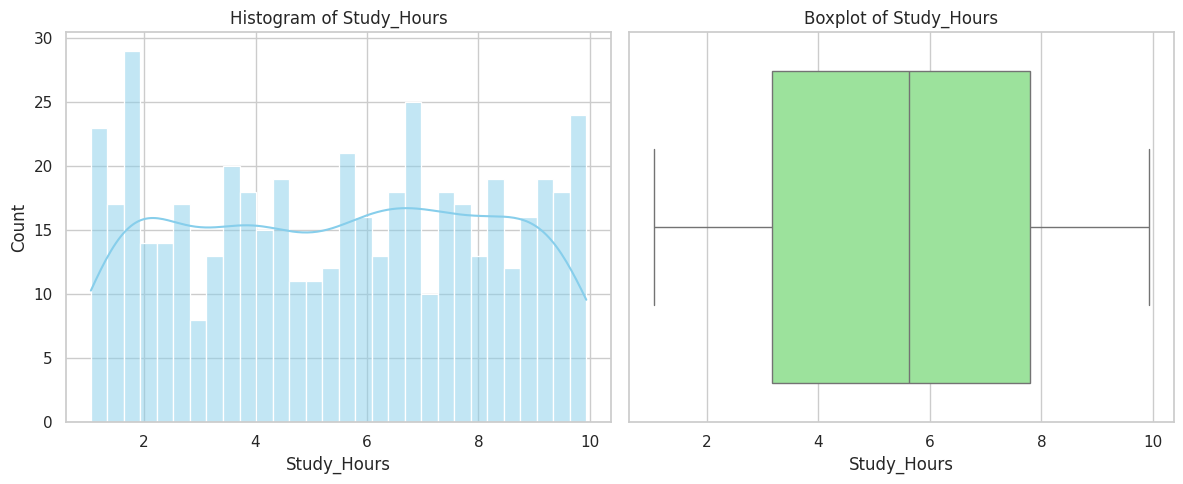

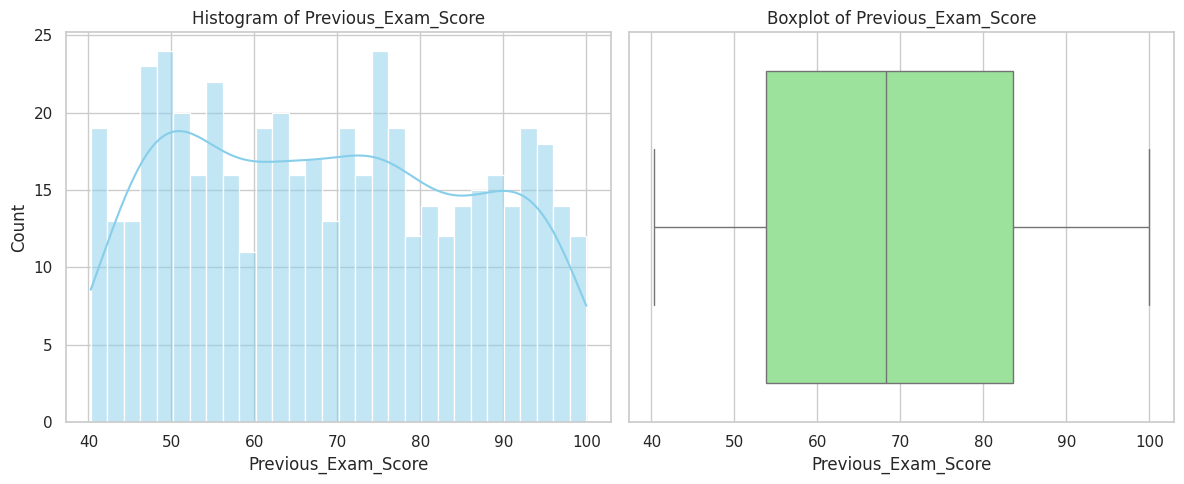

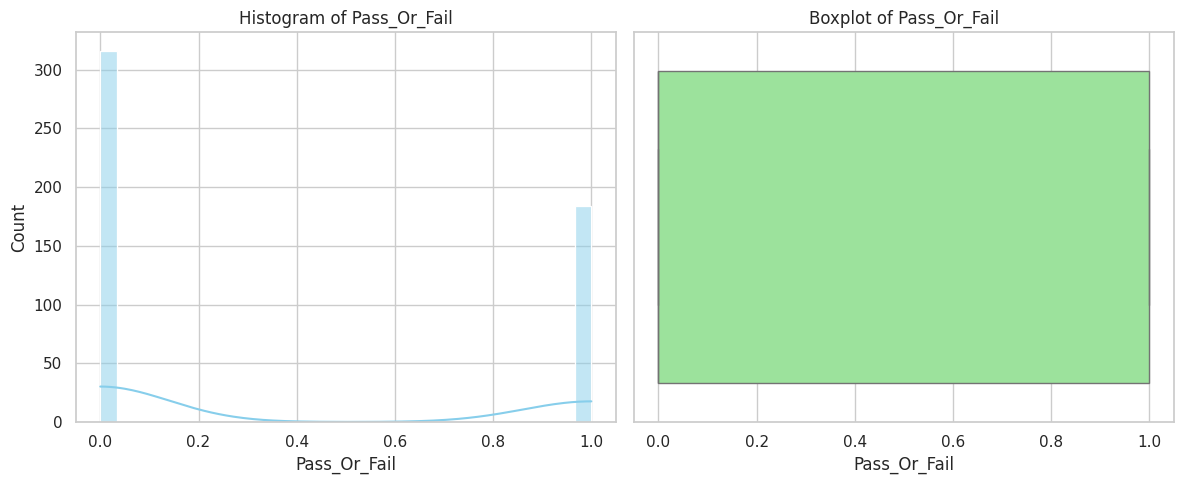

In [ ]:
#cols
for col in cols:
  plot_hist_Box_Plot(data, col)

# Bivariate Analysis

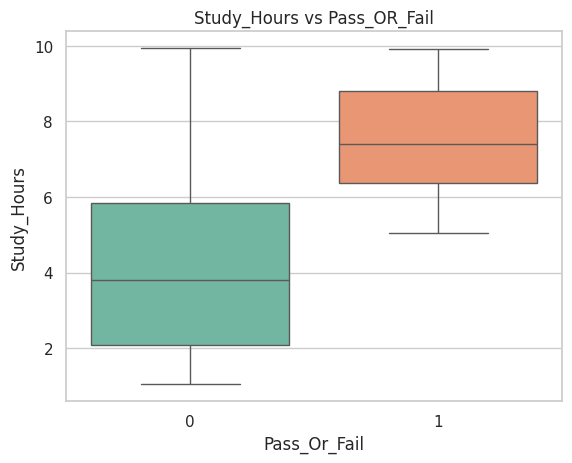

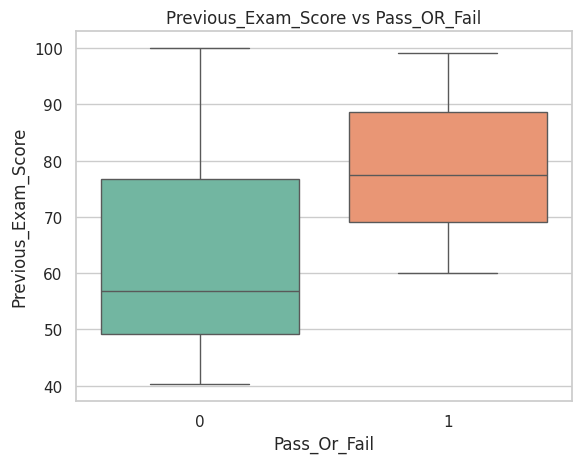

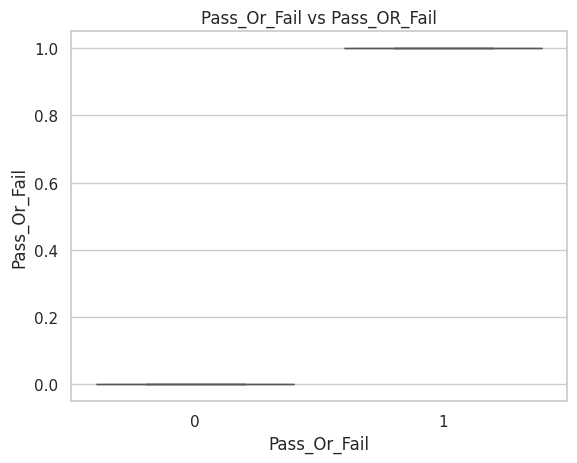

In [ ]:
for col in cols:
  sns.boxplot(data=data, palette="Set2", x='Pass_Or_Fail', y=col)
  plt.title(f"{col} vs Pass_OR_Fail")
  plt.show()

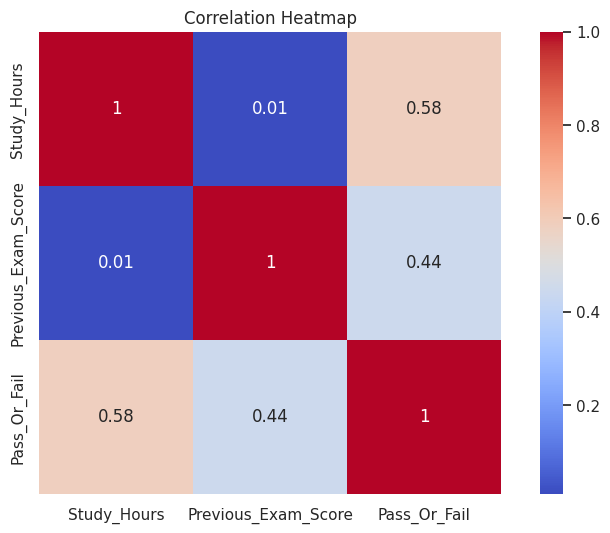

In [ ]:
# Heatmap of correlation matrix
def plot_correlation_heatmap(df):
  """
    Display correlation heatmap for numerical columns.

    Parameters:
    df (pd.DataFrame): Input dataframe
    """
  plt.figure(figsize=(10,6))
  corr = df.corr()
  sns.heatmap(corr, annot=True, cmap='coolwarm', cbar=True, square=True)
  plt.title("Correlation Heatmap")

#Example usage
plot_correlation_heatmap(data[cols])
plt.show()

# Data transforming and Encoding

In [ ]:
x = data.iloc[:, :-1]
y=data["Pass_Or_Fail"]

In [ ]:
x.head()

,Study_Hours,Previous_Exam_Score
0,4.370861,81.889703
1,9.556429,72.165782
2,7.587945,58.571657
3,6.387926,88.827701
4,2.404168,81.083870


# Model Building and Evaluation

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(400, 2)
(100, 2)
(400,)
(100,)


In [ ]:
# =============================================
# Custome function: compute + plot confusion matrix
# and return classification metrics
# ===========================================

def evaluate_model(y_true, y_pred, title="Confusion matrix"):
  cm =confusion_matrix(y_true, y_pred)
  plt.figure(figsize=(6,4))
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
  plt.title(title)
  plt.xlabel("Predicted")
  plt.ylabel("Actual")
  plt.show()

  return{
      "accuracy": accuracy_score(y_true, y_pred),
      "precision": precision_score(y_true, y_pred),
      "recall": recall_score(y_true, y_pred),
      "f1_score": f1_score(y_true, y_pred),

  }

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)


LogisticRegression()

Train Evaluation:


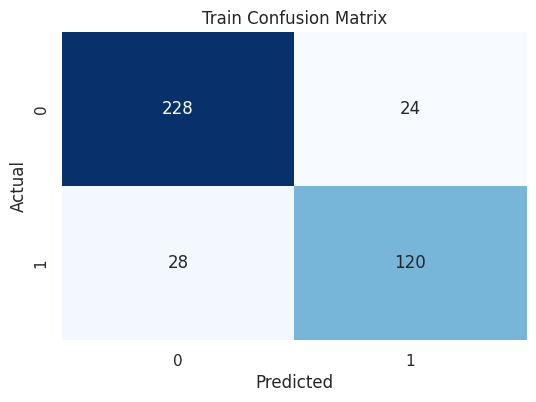

{'accuracy': 0.87, 'precision': 0.8333333333333334, 'recall': 0.8108108108108109, 'f1_score': 0.821917808219178}


In [ ]:
# predictions
y_train_pred = lr.predict(X_train)
print("Train Evaluation:")
train_metrics = evaluate_model(y_train, y_train_pred, title="Train Confusion Matrix")
print(train_metrics)

Test Evaluation:


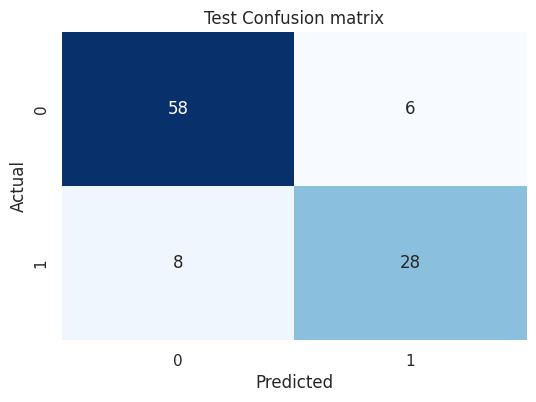

{'accuracy': 0.86, 'precision': 0.8235294117647058, 'recall': 0.7777777777777778, 'f1_score': 0.8}


In [ ]:
y_test_pred = lr.predict(X_test)

print("Test Evaluation:")
test_metrics = evaluate_model(y_test, y_test_pred, title="Test Confusion matrix")
print(test_metrics)

In [ ]:
# ==================================
# Plot train and test evaluation metrics
#=====================================

metrics_df = pd.DataFrame({
    "Dataset": ["Train", "Test"],
    "Accuracy": [train_metrics["accuracy"], test_metrics["accuracy"]],
    "Precision": [train_metrics["precision"], test_metrics["precision"]],
    "Recall": [train_metrics["recall"], test_metrics["recall"]],
    "F1 Score": [train_metrics["f1_score"], test_metrics["f1_score"]]
})

metrics_df


,Dataset,Accuracy,Precision,Recall,F1 Score
0,Train,0.87,0.833333,0.810811,0.821918
1,Test,0.86,0.823529,0.777778,0.800000


#Prediction

In [ ]:
# take one random row from test set
sample = X_test.sample(1, random_state=1)
print("Sample input row:\n", sample)

#prediction
pred = lr.predict(sample)
print("Prediction:", pred)

proba = lr.predict_proba(sample)
print("Probabilities:", proba)

Sample input row:
      Study_Hours  Previous_Exam_Score
154     9.870854            65.899573
Prediction: [1]
Probabilities: [[0.04617482 0.95382518]]


In [ ]:
lr.score(X_test, y_test)*100

86.0